# Placement Classification Problem

In [307]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stastics
from scipy import stats as st
import pylab

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [308]:
df=pd.read_csv("Placement_data_full_class.csv")

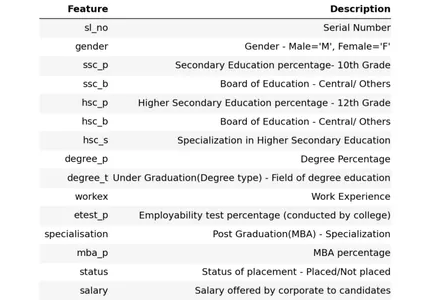

In [309]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [310]:
df.shape

(215, 15)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [312]:
df.duplicated().sum()

0

In [313]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [314]:
df['salary']

0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64

In [315]:
df['salary'].mean()

288655.4054054054

In [316]:
df['salary'].median()

265000.0

In [317]:
# when there is no outliers the u fill nan with mean
# otherwise fill with median

<AxesSubplot:>

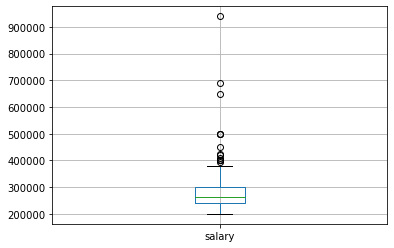

In [318]:
df.boxplot(column=['salary'])

In [319]:
df['salary']=df['salary'].fillna(df['salary'].median())

In [320]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<AxesSubplot:>

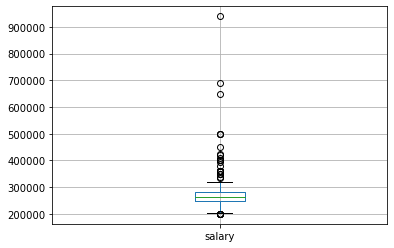

In [321]:
df.boxplot(column=['salary'])

In [322]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [323]:
df.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


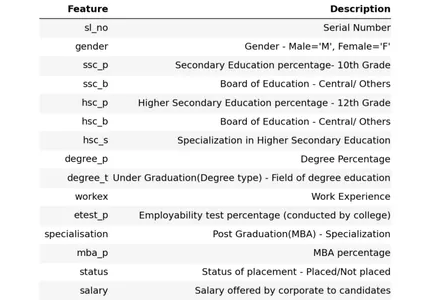

In [324]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

<AxesSubplot:title={'center':'board of education for 10th grade'}, xlabel='ssc_b', ylabel='count'>

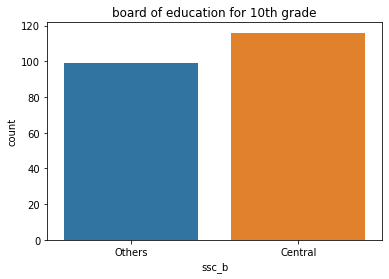

In [325]:
plt.title("board of education for 10th grade")
sns.countplot(df['ssc_b'])

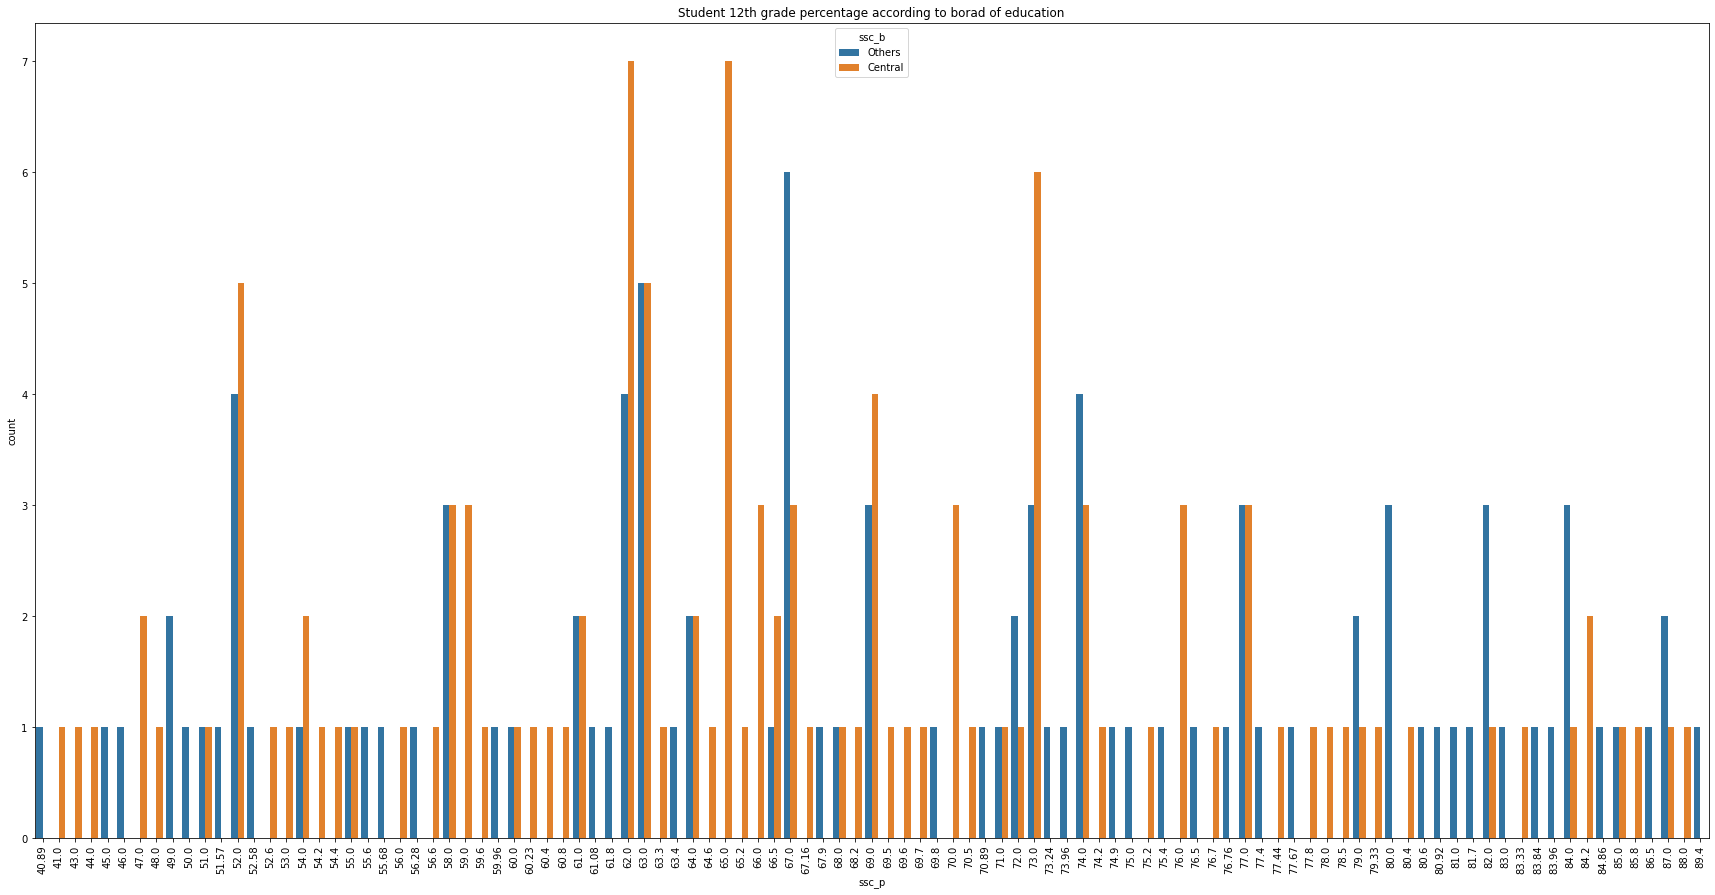

In [326]:
plt.figure(figsize=(30,15))
plt.title("Student 12th grade percentage according to borad of education")
sns.countplot(df['ssc_p'],hue='ssc_b',data=df)
plt.xticks(rotation=90)
plt.show()

In [327]:
df[df["ssc_p"]==52.0].shape

(9, 15)

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

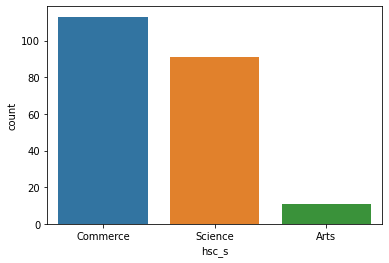

In [328]:
sns.countplot(df['hsc_s'])

<AxesSubplot:title={'center':'board of education for 12th grade'}, xlabel='hsc_b', ylabel='count'>

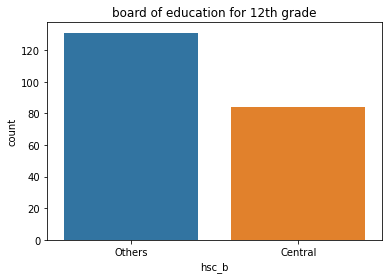

In [329]:
plt.title("board of education for 12th grade")
sns.countplot(df['hsc_b'])

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

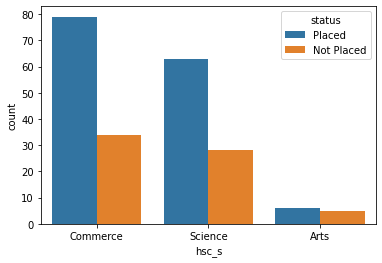

In [330]:
sns.countplot(df['hsc_s'],hue='status',data=df)

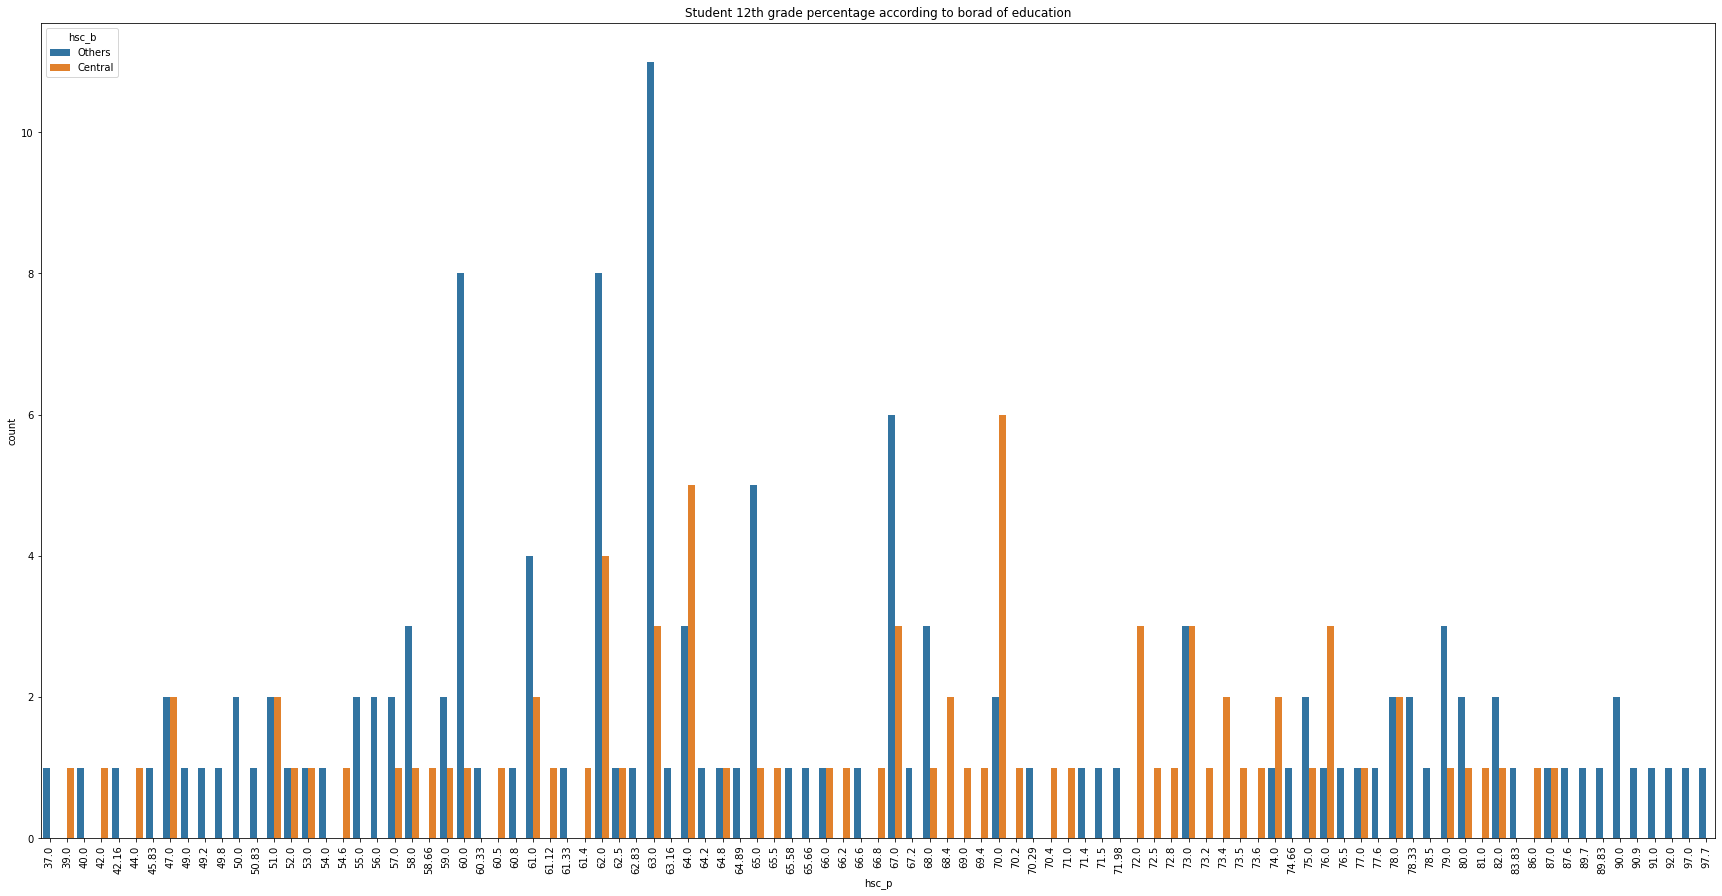

In [331]:
plt.figure(figsize=(30,15))
plt.title("Student 12th grade percentage according to borad of education")
sns.countplot(df['hsc_p'],hue='hsc_b',data=df)
plt.xticks(rotation=90)
plt.show()

In [332]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

<AxesSubplot:xlabel='degree_t', ylabel='count'>

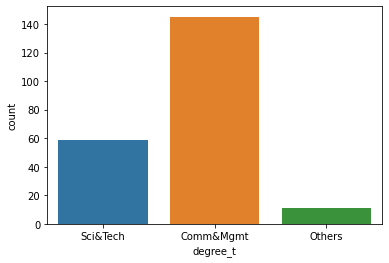

In [333]:
sns.countplot(df['degree_t'],data=df)

<AxesSubplot:xlabel='degree_t', ylabel='count'>

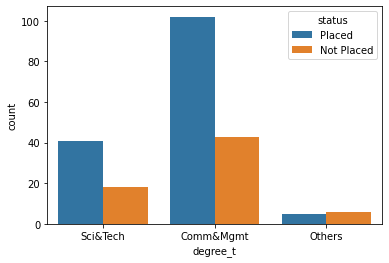

In [334]:
sns.countplot(df['degree_t'],hue='status',data=df)

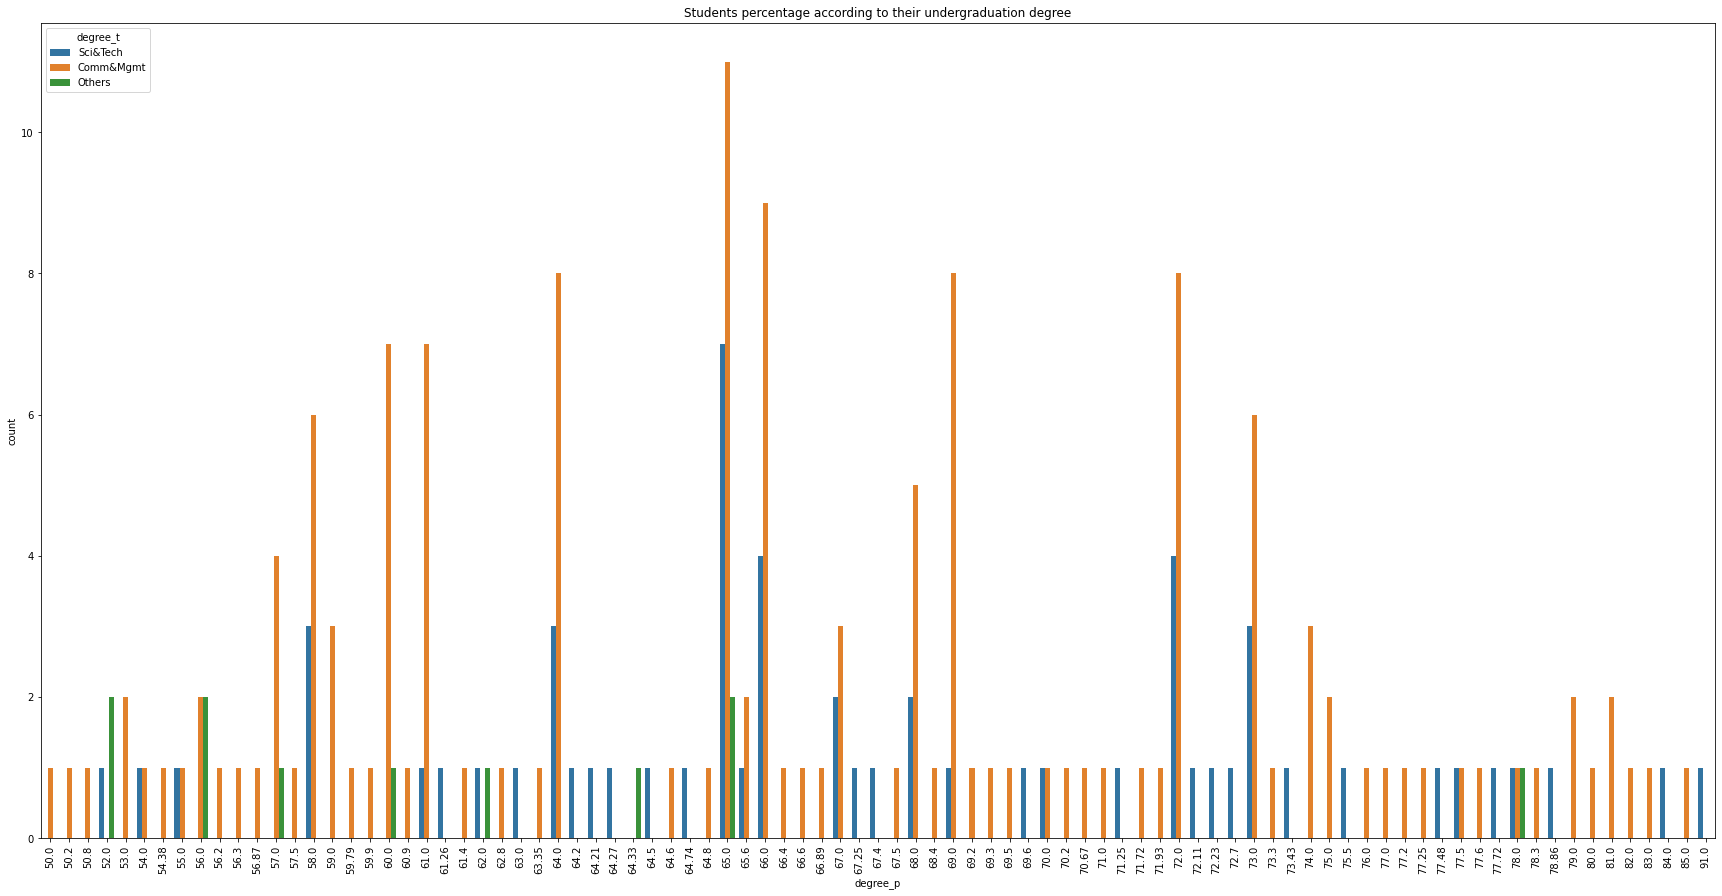

In [335]:
plt.figure(figsize=(30,15))
plt.title("Students percentage according to their undergraduation degree")
sns.countplot(df['degree_p'],hue='degree_t',data=df)
plt.xticks(rotation=90)
plt.show()

In [336]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


<AxesSubplot:xlabel='status', ylabel='count'>

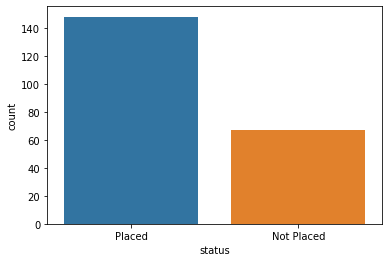

In [337]:
sns.countplot(df['status'],data=df)

<AxesSubplot:xlabel='status', ylabel='count'>

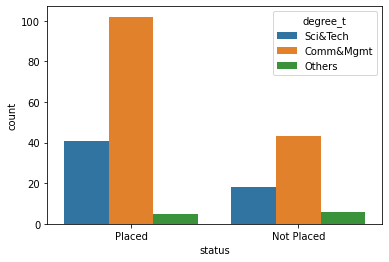

In [338]:
sns.countplot(df['status'],hue='degree_t',data=df)

<AxesSubplot:xlabel='workex', ylabel='count'>

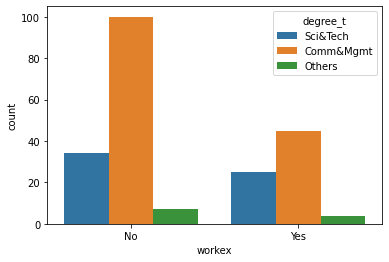

In [339]:
sns.countplot(df['workex'],hue='degree_t',data=df)

<AxesSubplot:xlabel='specialisation', ylabel='count'>

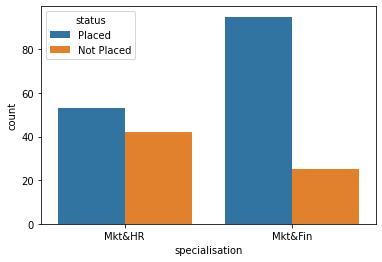

In [340]:
sns.countplot(df['specialisation'],hue='status',data=df)

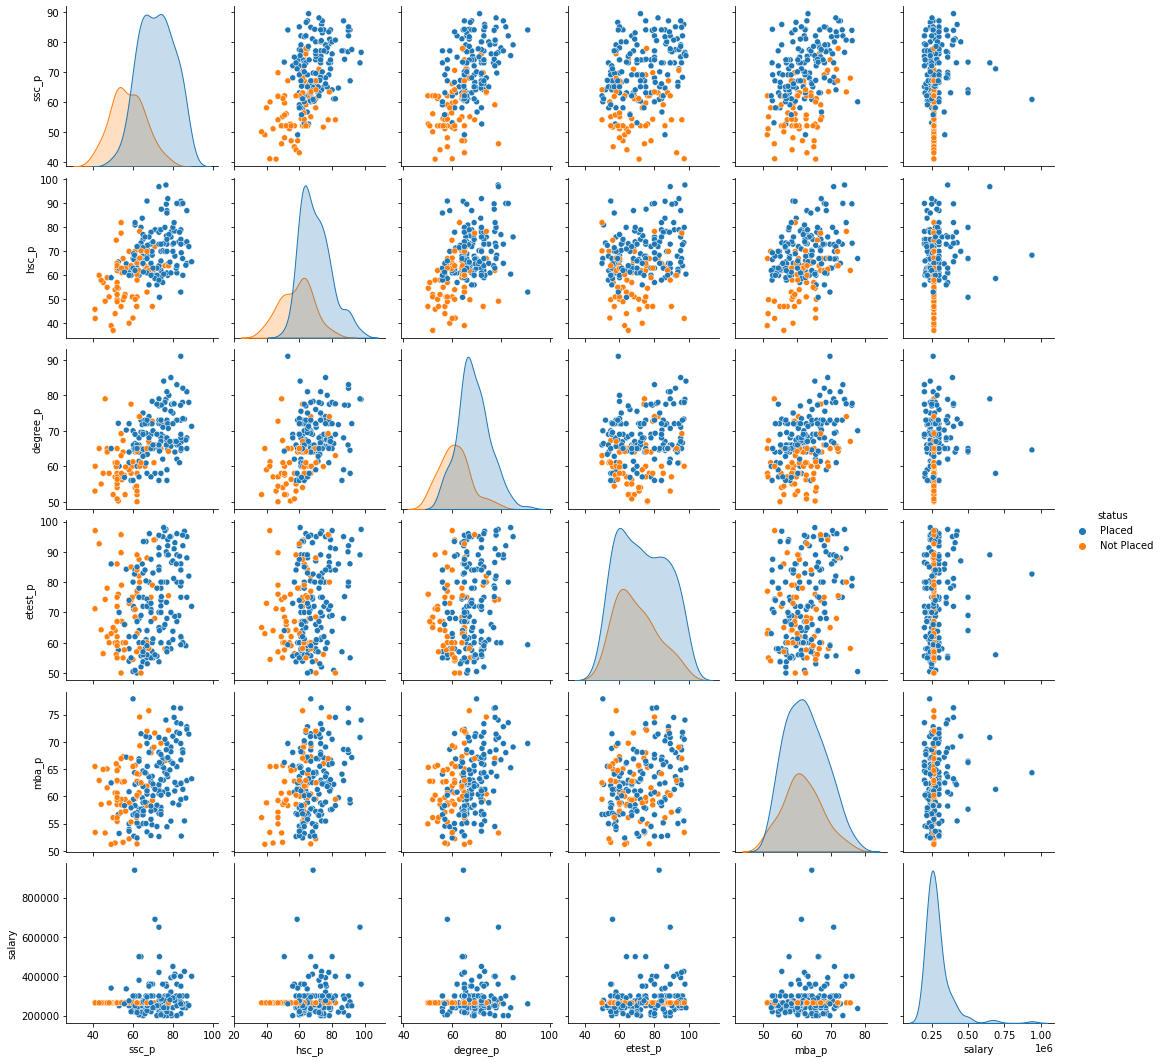

In [341]:
sns.pairplot(df.drop(columns="sl_no"),hue="status")
plt.show()

In [342]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [343]:
df['gender'].replace({'M':0,"F":1},inplace=True)
df['status'].replace({'Placed':0,"Not Placed":1},inplace=True)

In [344]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,0,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,0,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,0,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,1,265000.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,0,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,0,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,0,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,0,204000.0


In [345]:
# one hot encoding
df.drop(columns=['sl_no'],inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,0,270000.0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,0,200000.0
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,0,250000.0
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,1,265000.0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,0,400000.0
211,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,0,275000.0
212,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,0,295000.0
213,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,0,204000.0


In [346]:
df=pd.get_dummies(columns=['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],data=df)
df

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,ssc_b_Central,ssc_b_Others,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,67.00,91.00,58.00,55.0,58.80,0,270000.0,0,1,...,0,1,0,0,0,1,1,0,0,1
1,0,79.33,78.33,77.48,86.5,66.28,0,200000.0,1,0,...,0,0,1,0,0,1,0,1,1,0
2,0,65.00,68.00,64.00,75.0,57.80,0,250000.0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,0,56.00,52.00,52.00,66.0,59.43,1,265000.0,1,0,...,0,0,1,0,0,1,1,0,0,1
4,0,85.80,73.60,73.30,96.8,55.50,0,425000.0,1,0,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,91.0,74.49,0,400000.0,0,1,...,0,1,0,1,0,0,1,0,1,0
211,0,58.00,60.00,72.00,74.0,53.62,0,275000.0,0,1,...,0,0,1,0,0,1,1,0,1,0
212,0,67.00,67.00,73.00,59.0,69.72,0,295000.0,0,1,...,0,1,0,1,0,0,0,1,1,0
213,1,74.00,66.00,58.00,70.0,60.23,0,204000.0,0,1,...,0,1,0,1,0,0,1,0,0,1


In [347]:
x=df.drop(columns=['status'])
y=df['status']

In [348]:
x

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,0,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,0,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,0,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,1,...,0,0,1,0,0,1,1,0,0,1
4,0,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,91.0,74.49,400000.0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
211,0,58.00,60.00,72.00,74.0,53.62,275000.0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
212,0,67.00,67.00,73.00,59.0,69.72,295000.0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
213,1,74.00,66.00,58.00,70.0,60.23,204000.0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [349]:
y

0      0
1      0
2      0
3      1
4      0
      ..
210    0
211    0
212    0
213    0
214    1
Name: status, Length: 215, dtype: int64

In [350]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [351]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

model building for algorithms

In [352]:
training_score1=[]
testing_score1=[]

In [353]:
def model_pred_unscaled(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a = accuracy_score(y_train,y_pred_train)*100
    b = accuracy_score(y_test,y_pred)*100
    a.astype(int)
    b.astype(int)
    training_score1.append(a)
    testing_score1.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,y_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,y_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 86.04651162790698

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.9090909090909091
Recall Score of DecisionTreeClassifier() model is: 0.6666666666666666
F1 Score of DecisionTreeClassifier() model is: 0.7692307692307692

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


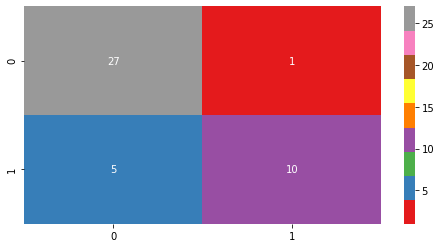

In [354]:
model_pred_unscaled(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 93.02325581395348

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9285714285714286
Recall Score of RandomForestClassifier() model is: 0.8666666666666667
F1 Score of RandomForestClassifier() model is: 0.896551724137931

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


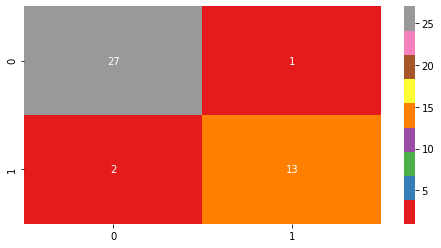

In [355]:
model_pred_unscaled(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 100.0
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 100.0

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 1.0
Recall Score of AdaBoostClassifier() model is: 1.0
F1 Score of AdaBoostClassifier() model is: 1.0

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


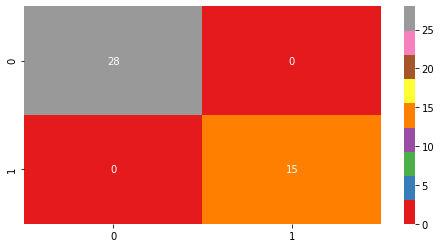

In [356]:
model_pred_unscaled(AdaBoostClassifier())

[17:57:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 100.0


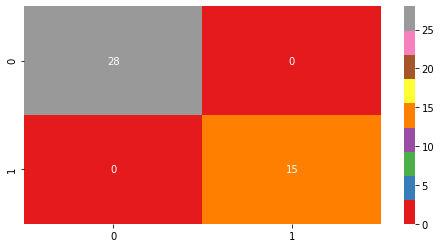

In [357]:
model_pred_unscaled(XGBClassifier(verbose=False))

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x00000204E23A8A30> model on Training Data is: 100.0
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x00000204E23A8A30> model on Testing Data is: 100.0

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x00000204E23A8A30> model is: 1.0
Recall Score of <catboost.core.CatBoostClassifier object at 0x00000204E23A8A30> model is: 1.0
F1 Score of <catboost.core.CatBoostClassifier object at 0x00000204E23A8A30> model is: 1.0

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x00000204E23A8A30> model is:


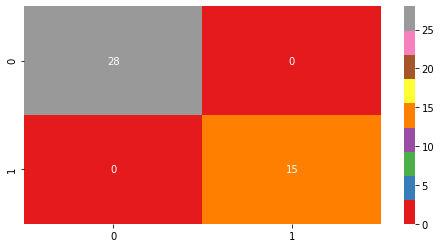

In [358]:
model_pred_unscaled(CatBoostClassifier(verbose=False))

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 100.0
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 100.0

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 1.0
Recall Score of GradientBoostingClassifier() model is: 1.0
F1 Score of GradientBoostingClassifier() model is: 1.0

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


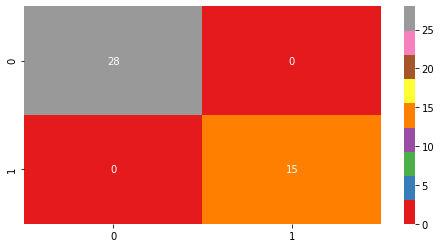

In [359]:
model_pred_unscaled(GradientBoostingClassifier())

Accuracy_Score of GaussianNB() model on Training Data is: 97.09302325581395
Accuracy_Score of GaussianNB() model on Testing Data is: 97.67441860465115

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.9375
Recall Score of GaussianNB() model is: 1.0
F1 Score of GaussianNB() model is: 0.967741935483871

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


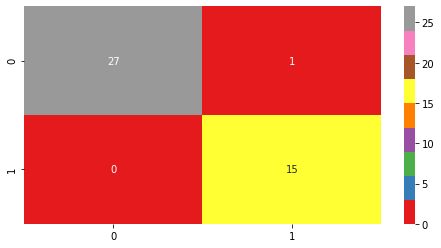

In [360]:
model_pred_unscaled(GaussianNB())

Accuracy_Score of BernoulliNB() model on Training Data is: 68.02325581395348
Accuracy_Score of BernoulliNB() model on Testing Data is: 79.06976744186046

------------------------------------------------------------------------
Precision Score of BernoulliNB() model is: 0.75
Recall Score of BernoulliNB() model is: 0.6
F1 Score of BernoulliNB() model is: 0.6666666666666665

------------------------------------------------------------------------
Confusion Matrix of BernoulliNB() model is:


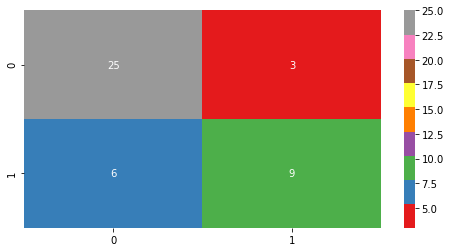

In [361]:
model_pred_unscaled(BernoulliNB())

In [362]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.2,random_state=4)

In [363]:
def model_pred_scaled(model):
    model.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    y_pred_train1=model.predict(x_train1)
    a = accuracy_score(y_train1,y_pred_train1)*100
    b = accuracy_score(y_test1,y_pred1)*100
    a.astype(int)
    b.astype(int)
    training_score1.append(a)
    testing_score1.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,y_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,y_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,y_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test1,y_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 81.97674418604652
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 79.06976744186046

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.875
Recall Score of KNeighborsClassifier() model is: 0.4666666666666667
F1 Score of KNeighborsClassifier() model is: 0.608695652173913

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


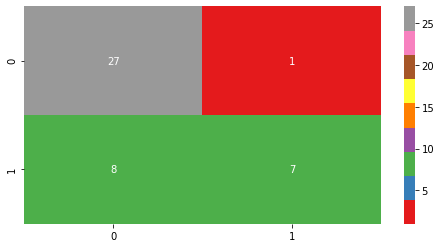

In [364]:
model_pred_scaled(KNeighborsClassifier())

Accuracy_Score of SVC() model on Training Data is: 94.76744186046511
Accuracy_Score of SVC() model on Testing Data is: 88.37209302325581

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.9166666666666666
Recall Score of SVC() model is: 0.7333333333333333
F1 Score of SVC() model is: 0.8148148148148148

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


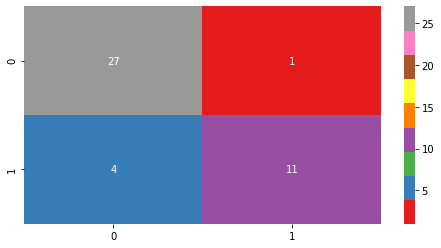

In [365]:
model_pred_scaled(SVC())

Accuracy_Score of LogisticRegression() model on Training Data is: 91.27906976744185
Accuracy_Score of LogisticRegression() model on Testing Data is: 88.37209302325581

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.9166666666666666
Recall Score of LogisticRegression() model is: 0.7333333333333333
F1 Score of LogisticRegression() model is: 0.8148148148148148

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


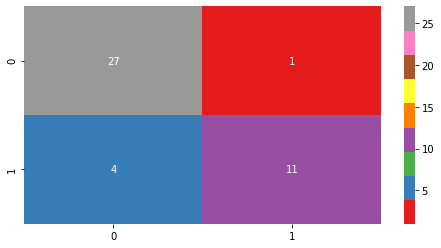

In [366]:
model_pred_scaled(LogisticRegression())

In [367]:
MODEL=["Decision Tree","Random Forest","Ada Boost",'XGBClassifier','CatBoosting',"GradientBoosting",'GaussianNB','BernaulliNB',"KNN","SVM","Logistic Regression"]

In [368]:
df1=pd.DataFrame({"Models":MODEL,
                "Training_Score":training_score1,
                 "Testing_Score":testing_score1})

In [369]:
df1

,Models,Training_Score,Testing_Score
0,Decision Tree,100.000000,86.046512
1,Random Forest,100.000000,93.023256
2,Ada Boost,100.000000,100.000000
3,XGBClassifier,100.000000,100.000000
4,CatBoosting,100.000000,100.000000
5,GradientBoosting,100.000000,100.000000
6,GaussianNB,97.093023,97.674419
7,BernaulliNB,68.023256,79.069767
8,KNN,81.976744,79.069767
9,SVM,94.767442,88.372093


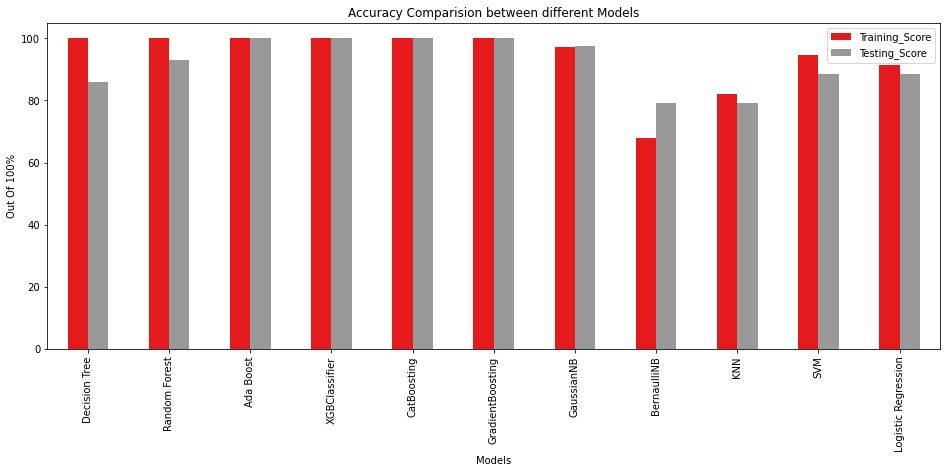

In [371]:
df1.plot(x='Models',y=['Training_Score','Testing_Score'],kind='bar',colormap="Set1",figsize=(16,6))
plt.title("Accuracy Comparision between different Models")
plt.xlabel("Models")
plt.ylabel("Out Of 100%")
plt.show()

<!-- div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px"> -->

<b>Observation</b><br>
    
💡 Highest performance was give by 
1	Ada Boost
2	XGBClassifier
3	CatBoosting
4	GradientBoosting 100%<br>

💡 Second Highest performance was given by Random Forest ,Decision & Tree approx above 90%<br>

💡 So we will do Hyper-Parameter Tunning on above 4 Models.<br></div>

In [372]:
# Hyperparameter tunning for catboost

In [373]:
model2 = CatBoostClassifier(verbose=False)

In [374]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [375]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [376]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000204DBA53EE0>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [377]:
grid_search2.best_score_

0.9825210084033614

In [378]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 10, 'iterations': 35, 'learning_rate': 0.5, 'random_state': 48}

In [379]:
# Creating Cat Boost Model Using Best Parameters

In [380]:
model2 = CatBoostClassifier(**best_parameters2,verbose=False)

In [381]:
model2.fit(x_train,y_train)

In [382]:
y_pred = model2.predict(x_test)

In [383]:
y_pred_train=model2.predict(x_train)

In [384]:
accuracy_score(y_test,y_pred)

1.0

In [385]:
accuracy_score(y_train,y_pred_train)

1.0

In [386]:
# Hyperparameter tunning for XGboost

In [387]:
model3 = XGBClassifier()

In [388]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [389]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [390]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [391]:
grid_search3.best_score_
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

In [392]:
# Creating XGBoost Model Using Best Parameters

In [393]:
model3 = XGBClassifier(**best_parameters3)

In [394]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [395]:
y_pred = model3.predict(x_test)

In [396]:
y_pred_train = model3.predict(x_train)

In [397]:
accuracy_score(y_test,y_pred)

1.0

In [398]:
accuracy_score(y_train,y_pred_train)

1.0

In [399]:
# Hyperparameter tunning for adaboost
# base_estimator=None,
#     *,
#     n_estimators=50,
#     learning_rate=1.0,
#     algorithm='SAMME.R',
#     random_state=None,

In [400]:
model4 = AdaBoostClassifier()

In [410]:
parameters3 = {'algorithm': ['SAMME', 'SAMME.R'],
              'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
              'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]}

In [411]:
grid_search3 = GridSearchCV(model4, parameters3 , cv=5, n_jobs=-1)

In [412]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30]})

In [417]:
grid_search3.best_score_
best_parameters3 = grid_search3.best_params_
best_parameters3

{'algorithm': 'SAMME.R', 'learning_rate': 1.01, 'n_estimators': 8}

In [418]:
# Creating ADABoost Model Using Best Parameters

In [419]:
model4 = AdaBoostClassifier(**best_parameters3)

In [420]:
model4.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.01, n_estimators=8)

In [423]:
y_pred = model4.predict(x_test)

In [424]:
y_pred_train = model4.predict(x_train)

In [425]:
accuracy_score(y_test,y_pred)

1.0

In [426]:
accuracy_score(y_train,y_pred_train)

1.0

<b>Observation</b><br>
    
💡 After hyperparameter tunning the performance is same given by 
1	Ada Boost
2	XGBClassifier
3	CatBoosting
4	GradientBoosting 100%<br>